In [9]:

for i in tqdm(range(100), desc="Training", unit="iter", ncols=100):
    1+1


Training: 100%|█████████████████████████████████████████████| 100/100 [00:00<00:00, 429304.40iter/s]


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from tqdm import tqdm
import torch
import torch.nn as nn
# from scipy.integrate import odeint
# from functions import nth_derivative, partial
# from torch.autograd.functional import jacobian
# from torch.autograd.functional import hessian
import mplcyberpunk


In [14]:
plt.style.use('cyberpunk')

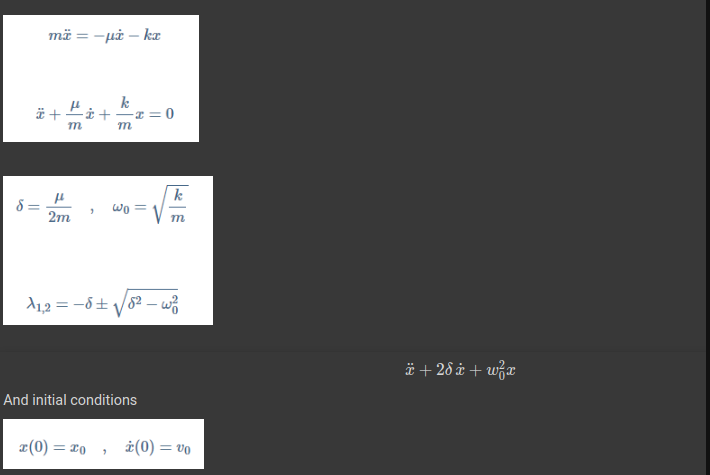

In this case, the imputs of the network are: the time $t$ and the initial condition $x_0$.

And the outputs: $ANN$ and $x_0$

The reparametrization for this Neuman problem is then:

$$\hat{x}(t,x_0,\theta) = x_0 + (t - t_0)\dot{x}_0 + \left(1 - e^{(t-t_0)} \right)^2 ANN(t)$$

#### Architecture 

In [25]:
nodos=40
ANN = nn.Sequential(nn.Linear(6, nodos), nn.Tanh(), nn.Linear(nodos,nodos),
                    nn.Tanh(), nn.Linear(nodos,nodos),
                    nn.Tanh(), nn.Linear(nodos,nodos),
                    # nn.Tanh(), nn.Linear(nodos,nodos),
                    # nn.Tanh(), nn.Linear(nodos,nodos),
                    nn.Tanh(),nn.Linear(nodos,1))
print(ANN)

Sequential(
  (0): Linear(in_features=6, out_features=40, bias=True)
  (1): Tanh()
  (2): Linear(in_features=40, out_features=40, bias=True)
  (3): Tanh()
  (4): Linear(in_features=40, out_features=40, bias=True)
  (5): Tanh()
  (6): Linear(in_features=40, out_features=40, bias=True)
  (7): Tanh()
  (8): Linear(in_features=40, out_features=1, bias=True)
)


In [26]:
#Init free parameters
t = torch.linspace(0,12,15)
m = torch.linspace(1,5,5)  # Mass
k = torch.linspace(0.5,3,5)  # Oscilator constant
b = torch.linspace(0.1,3,5)  # dammp parameter

#Init problem conditions
x0 = torch.linspace(-5,5,10)
v0 = torch.linspace(0,5,6)

T = torch.cartesian_prod(t,x0,v0,m,k,b)
T.requires_grad=True


In [27]:
T.shape

torch.Size([112500, 6])

In [28]:
def nth_derivative(net, x, n):
    # Initialize the gradient tensor to 1.0, as the 0th derivative is the function itself.
    ann=net(x)
    grad_tensor = torch.ones(ann.size(), dtype=torch.float32, requires_grad=True)
    for _ in range(n):
        # Compute the gradient of the network's output with respect to the input.
        ann = torch.autograd.grad(ann, x, grad_outputs=grad_tensor, create_graph=True)[0]
    return ann

**Reparametrization**

In [ ]:
def Param(T,net=ANN):
    out = net(T)
    a=torch.reshape(T[:,1],out.shape)
    b=1-torch.exp(ti-T[:,0])
    c=(1 - torch.reshape(T[:,1],out.shape))
   
    #return torch.reshape(T[:,1],out.size()) + b*out
    return torch.reshape(T[:,1],out.shape) + b.reshape(out.shape)*out

tensor([ 0.,  0.,  0.,  ..., 12., 12., 12.], grad_fn=<SelectBackward0>)

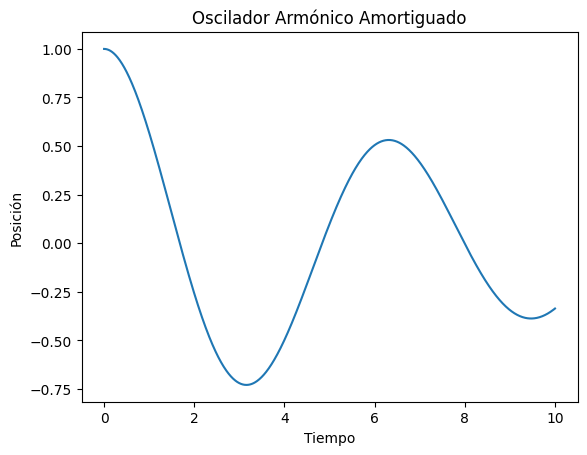

In [11]:
# Parámetros del oscilador armónico amortiguado
m = 1.0  # Masa
k = 1.0  # Constante del resorte
b = 0.2  # Coeficiente de amortiguamiento

# Sistema de ecuaciones diferenciales para el oscilador amortiguado
def damped_oscillator(t, y):
    """
    Parámetros:
    t : tiempo
    y : vector de estado [posición, velocidad]
    """
    dydt = [y[1], -b * y[1] - k * y[0] / m]
    return dydt

# Condiciones iniciales
initial_conditions = [1.0, 0.0]  # [posición inicial, velocidad inicial]

# Tiempo de integración
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Resuelve el sistema de ecuaciones diferenciales
solution = solve_ivp(damped_oscillator, t_span, initial_conditions, t_eval=t_eval)

# Grafica la posición en función del tiempo
plt.plot(solution.t, solution.y[0])
plt.title('Oscilador Armónico Amortiguado')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.show()